In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

Preprocess Dataset

In [69]:
data = pd.read_csv("crime dataset.csv")
print("Dimention of dataset : ",data.shape)
print("Data Columns : ",data.columns)
print("Data Types")
print(data.dtypes)
print(data.head())


Dimention of dataset :  (7761, 7)
Data Columns :  Index(['Country', 'Crime name', 'Year', 'Age', 'Sex', 'No of recorded cases',
       'Source'],
      dtype='object')
Data Types
Country                  object
Crime name               object
Year                      int64
Age                      object
Sex                      object
No of recorded cases    float64
Source                   object
dtype: object
    Country Crime name  Year    Age    Sex  No of recorded cases Source
0   Albania   homicide  2003  Total  Total                 158.0   IAFQ
1   Armenia   homicide  2003  Total  Total                  73.0   IAFQ
2   Austria   homicide  2003  Total  Total                  37.0   IAFQ
3  Bulgaria   homicide  2003  Total  Total                 134.0   IAFQ
4   Bahrain   homicide  2003  Total  Total                   1.0   IAFQ


In [70]:
#check missing values
print(data.isnull().sum())

Country                  0
Crime name               0
Year                     0
Age                      0
Sex                      0
No of recorded cases     0
Source                  48
dtype: int64


In [71]:
# Convert data types to integer
data['Year'] = data['Year'].astype(int)
data['No of recorded cases'] = data['No of recorded cases'].astype(int)

#check for duplicates
print("\nNumber of duplicates:", data.duplicated().sum())

# Rename columns for consistency (remove spaces)
data.columns = [col.strip().replace(' ', '_') for col in data.columns]

print(data.dtypes)



Number of duplicates: 0
Country                 object
Crime_name              object
Year                     int64
Age                     object
Sex                     object
No_of_recorded_cases     int64
Source                  object
dtype: object


In [72]:
#drop unnecessary columns
data.drop(columns=['Age', 'Sex', 'Source'], inplace=True)

print(data.dtypes)
print(data.describe())


Country                 object
Crime_name              object
Year                     int64
No_of_recorded_cases     int64
dtype: object
              Year  No_of_recorded_cases
count  7761.000000           7761.000000
mean   2013.764850          12166.820899
std       5.750973          62651.046602
min    2003.000000              0.000000
25%    2009.000000             57.000000
50%    2014.000000            361.000000
75%    2019.000000           2960.000000
max    2023.000000         949193.000000


Classification models

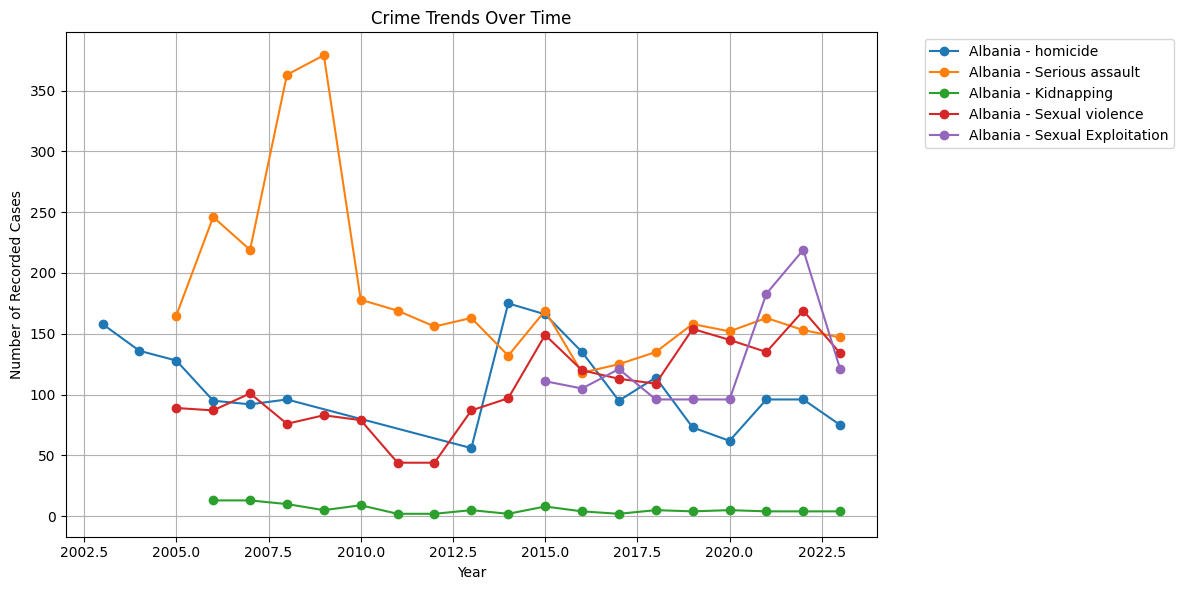

In [73]:
# Function to plot crime trends over time for selected countries
def plot_crime_trends(data, countries=['Albania']):
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = data[data['Country'] == country]
        for crime in country_data['Crime_name'].unique():
            crime_data = country_data[country_data['Crime_name'] == crime]
            plt.plot(crime_data['Year'], crime_data['No_of_recorded_cases'], 
                     label=f'{country} - {crime}', marker='o')
    plt.title('Crime Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Recorded Cases')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_crime_trends(data)


Crime counts for Albania by year and crime type:
Crime_name  Kidnapping  Serious assault  Sexual Exploitation  Sexual violence  \
Year                                                                            
2003                 0                0                    0                0   
2004                 0                0                    0                0   
2005                 0              165                    0               89   
2006                13              246                    0               87   
2007                13              219                    0              101   
2008                10              363                    0               76   
2009                 5              379                    0               83   
2010                 9              178                    0               79   
2011                 2              169                    0               44   
2012                 2              156                    0

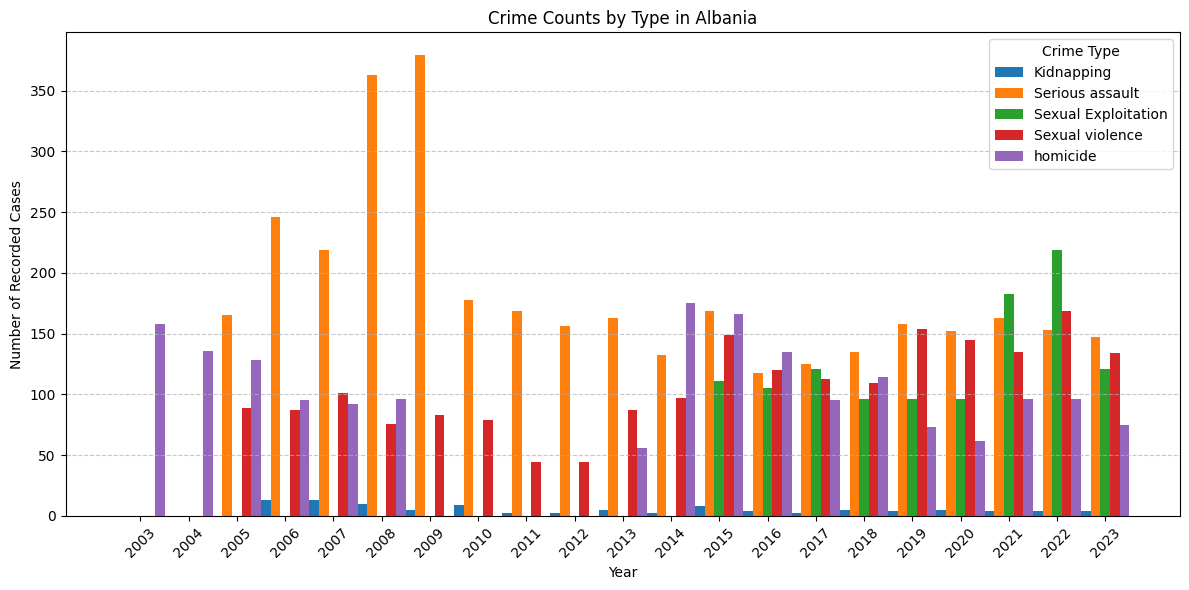

In [74]:
country = 'Albania'

# Filter data for the specified country
country_data = data[data['Country'] == country]

# Group by Year and Crime_name to get crime counts
crime_counts = country_data.groupby(['Year', 'Crime_name'])['No_of_recorded_cases'].sum().unstack(fill_value=0)

# Print crime counts for each crime type per year
print(f"Crime counts for {country} by year and crime type:")
print(crime_counts)

# Visualize crime counts per crime type over years
plt.figure(figsize=(12, 6))
bar_width = 0.2  # Width of each bar
years = crime_counts.index
crime_types = crime_counts.columns
n_crimes = len(crime_types)
x = np.arange(len(years))


for i, crime in enumerate(crime_types):
    plt.bar(x + i * bar_width, crime_counts[crime], bar_width, label=crime)

plt.title(f'Crime Counts by Type in {country}')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Cases')
plt.xticks(x + bar_width * (n_crimes - 1) / 2, years, rotation=45)
plt.legend(title='Crime Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
country = 'Ukraine'

# Filter data for the specified country
country_data = data[data['Country'] == country]

# Group by Year and Crime_name to get crime counts
crime_counts = country_data.groupby(['Year', 'Crime_name'])['No_of_recorded_cases'].sum().unstack(fill_value=0)

# Print crime counts for each crime type per year
print(f"Crime counts for {country} by year and crime type:")
print(crime_counts)

# Visualize crime counts per crime type over years
plt.figure(figsize=(12, 6))
bar_width = 0.2  # Width of each bar
years = crime_counts.index
crime_types = crime_counts.columns
n_crimes = len(crime_types)
x = np.arange(len(years))


for i, crime in enumerate(crime_types):
    plt.bar(x + i * bar_width, crime_counts[crime], bar_width, label=crime)

plt.title(f'Crime Counts by Type in {country}')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Cases')
plt.xticks(x + bar_width * (n_crimes - 1) / 2, years, rotation=45)
plt.legend(title='Crime Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
# Pivot data rows to columns for easier analysis
data_pivot = data.pivot_table(
    index=['Country', 'Year'],
    columns='Crime_name',
    values='No_of_recorded_cases',
    fill_value=0
).reset_index()
print(data_pivot.head())

Crime_name  Country  Year  Kidnapping  Serious assault  Sexual Exploitation  \
0           Albania  2003         0.0              0.0                  0.0   
1           Albania  2004         0.0              0.0                  0.0   
2           Albania  2005         0.0            165.0                  0.0   
3           Albania  2006        13.0            246.0                  0.0   
4           Albania  2007        13.0            219.0                  0.0   

Crime_name  Sexual violence  homicide  
0                       0.0     158.0  
1                       0.0     136.0  
2                      89.0     128.0  
3                      87.0      95.0  
4                     101.0      92.0  


In [76]:
# Get unique crime types
crime_types = data_pivot.columns[2:]  # Exclude 'Country' and 'Year'

# Function to create dataset with lagged features and target
def create_dataset(data, lags=3):
    dataset = []
    for country in data['Country'].unique():
        country_data = data[data['Country'] == country].sort_values('Year')
        years = country_data['Year'].values
        for i in range(lags, len(years) - 1):  # Need Y+1 for target
            Y = years[i]
            # Features: cases at Y, Y-1, Y-2
            features = []
            for lag in range(lags):
                year = Y - lag
                if year in years:
                    cases = country_data[country_data['Year'] == year][crime_types].values.flatten()
                    features.extend(cases)
                else:
                    features.extend([0] * len(crime_types))  # Fill missing years with 0
            # Target: crime type with max increase from Y to Y+1
            if Y + 1 in years:
                cases_Y = country_data[country_data['Year'] == Y][crime_types].values.flatten()
                cases_Y1 = country_data[country_data['Year'] == Y + 1][crime_types].values.flatten()
                increases = cases_Y1 - cases_Y
                if len(increases) > 0:
                    max_increase_idx = np.argmax(increases)
                    target = crime_types[max_increase_idx]
                else:
                    continue
            else:
                continue
            dataset.append([country, Y] + features + [target])
    # Create DataFrame
    feature_columns = [f'{crime}_Y-{lag}' for lag in range(lags) for crime in crime_types]
    columns = ['Country', 'Year'] + feature_columns + ['Target']
    return pd.DataFrame(dataset, columns=columns)


In [77]:
# Prepare dataset with 3 lags
data_features = create_dataset(data_pivot, lags=3)

# Features and target
X = data_features.drop(['Country', 'Year', 'Target'], axis=1)
y = data_features['Target']

# Split data by year (e.g., train <= 2018, test > 2018)
train_mask = data_features['Year'] <= 2018
test_mask = data_features['Year'] > 2018
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Train and evaluate models individually
results = {}

In [78]:
# Model 1: Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(max_iter=10000)  # Increased max_iter
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
results['Logistic Regression'] = {'Accuracy': lr_accuracy, 'F1-Score': lr_f1}
print(f"Logistic Regression: Accuracy = {lr_accuracy:.4f}, F1-Score = {lr_f1:.4f}")


Training Logistic Regression...
Logistic Regression: Accuracy = 0.3516, F1-Score = 0.3179


c:\Users\Buddhimal_Sampath\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# Model 2: Decision Tree
print("\nTraining Decision Tree...")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
results['Decision Tree'] = {'Accuracy': dt_accuracy, 'F1-Score': dt_f1}
print(f"Decision Tree: Accuracy = {dt_accuracy:.4f}, F1-Score = {dt_f1:.4f}")



Training Decision Tree...
Decision Tree: Accuracy = 0.2682, F1-Score = 0.2708


In [80]:
# Model 3: Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
results['Random Forest'] = {'Accuracy': rf_accuracy, 'F1-Score': rf_f1}
print(f"Random Forest: Accuracy = {rf_accuracy:.4f}, F1-Score = {rf_f1:.4f}")


Training Random Forest...
Random Forest: Accuracy = 0.3438, F1-Score = 0.3336


In [81]:
# Model 4: Gradient Boosting
print("\nTraining Gradient Boosting...")
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
results['Gradient Boosting'] = {'Accuracy': gb_accuracy, 'F1-Score': gb_f1}
print(f"Gradient Boosting: Accuracy = {gb_accuracy:.4f}, F1-Score = {gb_f1:.4f}")



Training Gradient Boosting...
Gradient Boosting: Accuracy = 0.3542, F1-Score = 0.3480


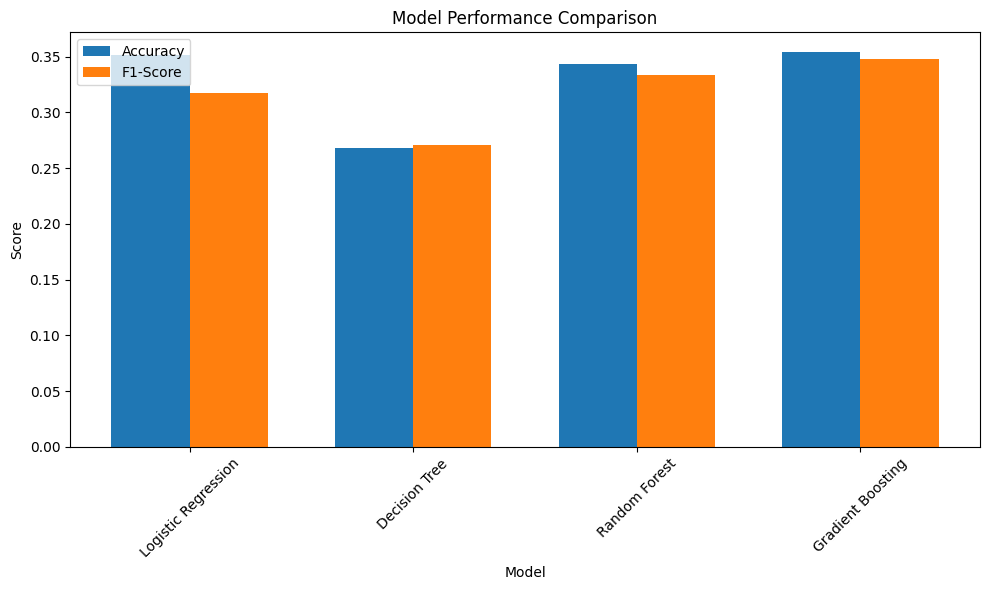

In [82]:
# Visualization 2: Model Performance Comparison
def plot_model_performance(results):
    models_names = list(results.keys())
    accuracies = [results[model]['Accuracy'] for model in models_names]
    f1_scores = [results[model]['F1-Score'] for model in models_names]
    
    x = np.arange(len(models_names))
    width = 0.35
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, accuracies, width, label='Accuracy', color='#1f77b4')
    plt.bar(x + width/2, f1_scores, width, label='F1-Score', color='#ff7f0e')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x, models_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_model_performance(results)

So the best model to use is gradient boost


Predictions for 2024 using Gradient Boosting:
                              Country      Predicted_Crime
0    Saint Vincent and the Grenadines      Serious assault
1    Saint Vincent and the Grenadines      Serious assault
2               Sao Tome and Principe           Kidnapping
3               Sao Tome and Principe      Serious assault
4               Sao Tome and Principe           Kidnapping
..                                ...                  ...
318                        Uzbekistan      Serious assault
319                             Yemen      Serious assault
320                          Zimbabwe           Kidnapping
321                          Zimbabwe  Sexual Exploitation
322                          Zimbabwe      Serious assault

[323 rows x 2 columns]


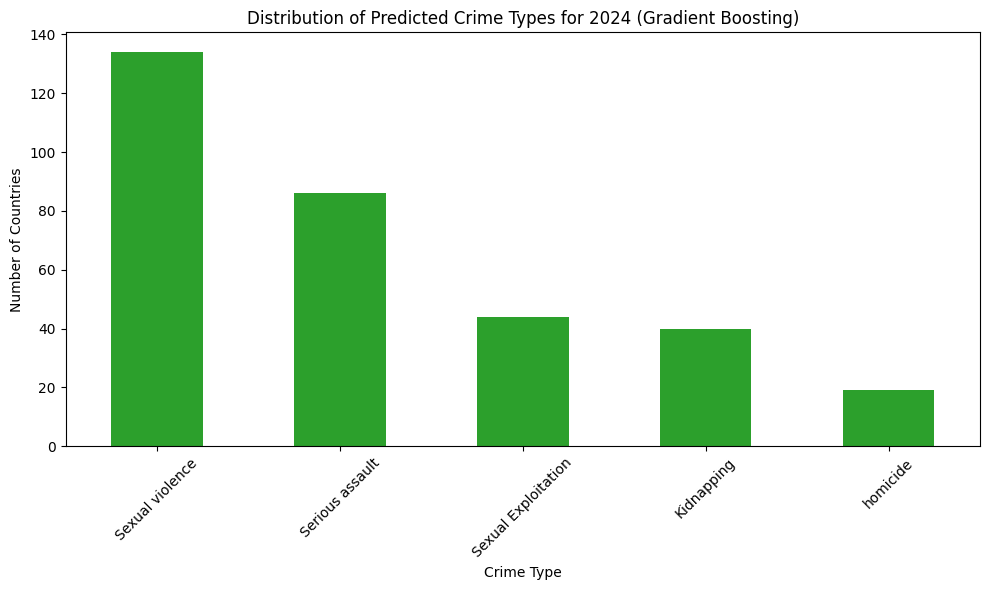

In [83]:
# Predict for the next year (e.g., 2023 data to predict 2024)
latest_year = data_pivot['Year'].max()
if latest_year >= 2023:
    latest_data = data_pivot[data_pivot['Year'] <= 2023]
    latest_features = create_dataset(latest_data.tail(3 * len(data_pivot['Country'].unique())), lags=3)
    X_latest = latest_features.drop(['Country', 'Year', 'Target'], axis=1, errors='ignore')
    predictions = gb_model.predict(X_latest)
    latest_features['Predicted_Crime'] = predictions
    print("\nPredictions for 2024 using Gradient Boosting:")
    print(latest_features[['Country', 'Predicted_Crime']])
    
    # Visualization 3: Prediction Distribution
    def plot_prediction_distribution(predictions):
        plt.figure(figsize=(10, 6))
        prediction_counts = pd.Series(predictions).value_counts()
        prediction_counts.plot(kind='bar', color='#2ca02c')
        plt.title('Distribution of Predicted Crime Types for 2024 (Gradient Boosting)')
        plt.xlabel('Crime Type')
        plt.ylabel('Number of Countries')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    plot_prediction_distribution(predictions)
else:
    print("Not enough data to predict for 2024; evaluate on test set using Gradient Boosting instead.")
    y_pred_gb = gb_model.predict(X_test)
    print("Test set predictions using Gradient Boosting:")
    print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb}).head())